In [1]:
# Set up environment with correct dependencies
using Pkg
Pkg.activate(".")
Pkg.instantiate()

 Activating environment at `~/GitHub/MathSys/teaching/MA934/MA934-slides/Project.toml`


In [2]:
using Plots
using LaTeXStrings
pyplot()
# Set default fonts for all plots
fnt = Plots.font("DejaVu Sans", 8.0)
default(titlefont=fnt, guidefont=fnt, tickfont=fnt, legendfont=fnt)

## MA934

## Recursive functions and sorting algorithms

### How your choice of algorithm can really make a difference

### Iteration vs recursion

* An iterative function is one that loops to repeat some part of the code. 
* A recursive function is one that calls itself again to repeat the code.

Recursive functions are a natural framework for implementing divide and conquer algorithms.

### Anatomy of recursive functions

Every recursive function consists of:
* one or more **recursive cases**: inputs for which the function calls itself 
* one or more **base cases**: inputs for which the function returns a (usually simple) value.

In [1]:
function f(n)
    if n==1
        return 1
    else
        return n*f(n-1)
    end
end

f (generic function with 1 method)

In [2]:
print([f(n) for n in 1:10])

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]

Recursive function calls incur additional computational overheads.

### Overheads: call stack and recursion depth
$$
\begin{align}
f(4) &= 4 * f(3)\\  
     &= 4*(3*(f(2))\\  
     &= 4*(3*(2*f(1))\\  
     &= 4*(3*(2*(1*f(0))))\\  
     &= 4*(3*(2*(1*1)))\\
     &= 4*(3*(2*1))\\  
     &= 4*(3*2)\\  
     &= 4*6 = 24.  
\end{align}
$$

* Variables and information associated with each call stored on the **call stack** until base case is reached.
* **Recursion depth**: maximum size of the call stack.
* Infinite (or excessive) recursion depth leads to **stack overflow**.

### Example : iterative calculation of the Fibonacci sequence

The Fibonacci numbers are defined by the recursion:

$$F_n = F_{n-1} + F_{n-2}$$ 

with $F_1 = 0$, $F_2 = 1$.

Obvious approach by iteration:


In [3]:
function Fib1(n)
    if n==1 || n ==2
        return n-1
    else
    a = zeros(Int64,n)
    a[1] = 0; a[2] = 1
    for i in 3:n
        a[i] = a[i-1] + a[i-2]
    end
    return a[n]
    end
end


Fib1 (generic function with 1 method)

In [4]:
print(Fib1.(1:10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### Example : recursive calculation of the Fibonacci sequence 

This can also by done recursively:


In [5]:
function Fib2(n)
    if n == 1 || n == 2
        return n-1
    else
        return Fib2(n-1) + Fib2(n-2)
    end
end

Fib2 (generic function with 1 method)

In [6]:
print(Fib2.(1:10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### Aside : memoization

Memoization is a technique that uses a lookup table to "remember" the values returned by a function for previously evaluated inputs. Avoids repeated evaluations with the same input.

Here is another Fibonacci function that combines memoization with recursion:

In [7]:
memo = Dict()
memo[1] = 0
memo[2] = 1

function Fib3(n)
    if !(n in keys(memo))
        memo[n]=Fib3(n-1)+Fib3(n-2)
    end
    return memo[n]
end
        

Fib3 (generic function with 1 method)

In [8]:
print(Fib3.(1:10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

> Take home :  there are often lots of ways of doing the same thing.  
> Now let's look at something less trivial.
 
### Sorting



Sorting is the task of placing an unordered list of integers in order with as few comparisons as possible.

There are **lots** of ways of doing this.

### Insertion sort - an iterative sort

Insertion sort: step through each item in turn, placing it in the appropriate location among the previously examined items:

![insertion sort](files/images/insertionSort_idea.jpg)

![insertion sort](files/images/insertionSort_step1.jpg)

![insertion sort](files/images/insertionSort_step2.jpg)

![insertion sort](files/images/insertionSort_step3.jpg)

![insertion sort](files/images/insertionSort_step4.jpg)

### Computational complexity of insertion sort

Consider sorting an array of length $n$.
* **Best case**: if input array is already in order? $n$ comparisons.
* **Worst case**: if input array is in reverse order? $\frac{1}{2}\,n\,(n+1)$ comparisons. Why?
Computational complexity of insertion sort is therefore $\mathcal{O}(n^2)$.

Typical case $\sim n^2$. Can we do better?

### Partial sorts


A **partial q-sort** of a list of numbers is an ordering in which all subsequences with stride q are sorted.  
<img src="files/images/partialSort.jpg" alt="Drawing" style="width: 600px;"/>  
A trivial modification of insertion sort does partial q-sorts


### ShellSort - improving on insertion sort

* ShellSort: do a succession of partial q-sorts, with q taken from a pre-specified list, Q. 
* Start from a large increment and finish with increment 1, which produces a fully sorted list. 
* Performance depends on $Q$ but generally faster than insertion sort.

Example. $Q = \left\{2^i : i=i_{max},i_{max} −1,...,2,1,0\right\}$ where $i_{max}$ is the largest $i$ with $2^i < \frac{n}{2}$. Typical case $\sim n^\frac{3}{2}$ (although worst case still $n^2$.).


### ShellSort - improving on insertion sort

* Surprising (at first) that ShellSort beats insertion sort since the last pass is a full insertion sort. Why is this?
* A better choice of increments is $Q = \left\{\frac{1}{2}(3^i-1) : i=i_{max},i_{max} −1,...,2,1\right\}$. This gives typical case $\sim n^\frac{5}{4}$ and worst case $\sim n^\frac{3}{2}$.
* General understanding of the computational complexity of ShellSort is an open problem.


### Mergesort - a recursive sort

* divide-and-conquer sorting strategy invented by Von Neumann. 
* Mergesort interlaces two **sorted** arrays into a larger sorted array.
* Given the interlace() function, mergesort is very simple:

```Python
def mergeSort(A):
   n=len(A)
   if n == 1:
      return A  # an array of length 1 is already sorted
   else: m=n/2
      return interlace(mergeSort(A[0:m]), 
                       mergeSort(A[m:n]))
```

### Mergesort : the interlace() function

In [4]:
function interlace(A::Array{Int64,1}, B::Array{Int64,1})
      if length(A) == 0
        return B
      elseif length(B) == 0
        return A
      elseif A[1] < B[1]
        return vcat([A[1]], interlace(A[2:end], B))
      else
        return vcat([B[1]], interlace(A, B[2:end]))
      end    
    end

interlace (generic function with 1 method)

In [5]:
print(interlace([1,3,5],[2,4,6,8]))

[1, 2, 3, 4, 5, 6, 8]

### Complexity of Mergesort

The ```interlace()``` function can be shown to be $\mathcal{O}(n)$ where $n$ is the size of the output array.  
At level $k$, there are $2^{k-1}$ ```interlace()``` calls of size $\frac{n}{2^{k-1}}$.  
Therefore, each level is $\mathcal{O}(n)$.  
Number of levels, $L$, satisfies $n = 2^L$ so $L = \log_2n$. 



![Float32](files/images/recursionTree.jpg)

Heuristically, expect
$$ F(n) = \mathcal{O}(n\,\log_2n) $$

### Complexity of Mergesort

We can also write a recursion equation for $F(n)$ based on the function defnition:

$$ F(n) = 2\,F(\frac{n}{2}) + n^1 $$

with $F(1) = 1$.

This is the "Master theorem" case 2 so $\mathcal{O}(n\log_2n)$.

![Float32](files/images/sorting.jpg)

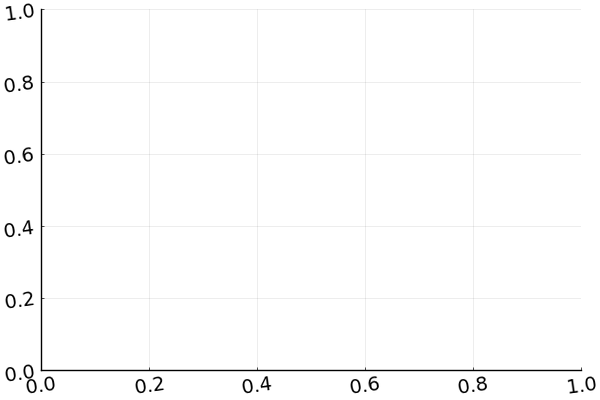

In [3]:
plot()